# Rozkład SVD

Na początek zobaczmy co to jest rozkład SVD.

In [1]:
# Singular-value decomposition
import numpy as np
from scipy.linalg import svd
from scipy.linalg import inv
import matplotlib.pyplot as plt

# Zad
Wygeneruj dane w $R^2$

A:
 [[1 2]
 [3 4]
 [5 6]]


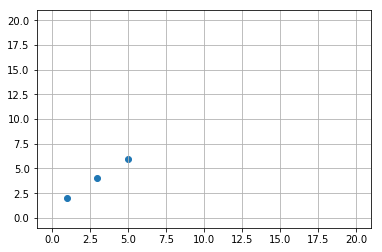

In [2]:
# define a matrix
A = np.array([[1, 2], [3, 4], [5, 6]])
print("A:\n", A)


plt.scatter(A[:,0],A[:,1])
plt.xlim(-1,21)
plt.ylim(-1,21)
plt.grid()
plt.show()

# Zad

Wykonaj rozkład SVD 

```python
from scipy.linalg import svd
```

i wypisz otrzymane macierze.

In [3]:
U, s, VT = svd(A)

print("U:\n", U)
S = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:A.shape[1], :A.shape[1]] = np.diag(s)
print("S\n", S)
print("V^T:\n", VT)

U:
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]]
S
 [[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]]
V^T:
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]]


Powstałe macierz pozwalają na rekonstrukcję oryginalnej macierzy w następujący sposób:

$$
A = U S V^T
$$

gdzie $S$ to macierz diagonalna z wyrazami $s$ na przekątnej. Wymiar $S$ jest taki jak wymiar macierzy $A$. Zobacz: https://en.wikipedia.org/wiki/Singular-value_decomposition dla ilustracji.


# Zad 
Proszę sprawdzić, że iloczyn tych macierzy rzeczywiście daje wyjściową macierz.

In [4]:
S = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
S[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(S.dot(VT))
print(B)

[[1. 2.]
 [3. 4.]
 [5. 6.]]


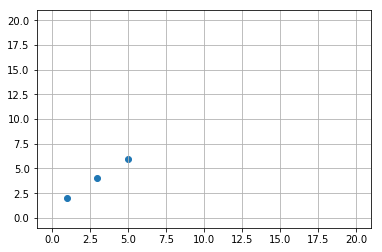

In [5]:
plt.scatter(B[:,0],B[:,1])
plt.xlim(-1,21)
plt.ylim(-1,21)
plt.grid()
plt.show()

Wyrazy $s$ to wartości singularne i są one powiązane z wartościami własnymi macierzy kowaiancji, a kolumny $V$ to wektory własne.

## Co robi SVD

Żeby zrozumieć co robi SVD, trzeba zdać sobie sprawę z tego że macierz to odwzorowanie liniowe. Każde odwzorowanie liniowe można przedstawić w postaci złożenia 3 odwzorowań: 
* obrotu, 
* skalowania, 
* obrotu 

to jest właśnie rozkład SVD. 

* Jak wyglądają te odwzorowania zobrazujemy sobie na przykładzie 2D.
* Potrzebne nam będą pomocnicze funkcje do rysowania.


In [6]:
import matplotlib.pyplot as plt

def plotVectors(vecs, cols, alpha=1):
    """
    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vectors is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors
    """
    plt.figure()
    plt.axvline(x=0, color='#A9A9A9', zorder=0)
    plt.axhline(y=0, color='#A9A9A9', zorder=0)

    for i in range(len(vecs)):
        x = np.concatenate([[0,0],vecs[i]])
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=cols[i],
                  alpha=alpha)
        
def matrixToPlot(matrix, vectorsCol=['#FF9A13', '#1190FF']):
    """
    Modify the unit circle and basis vector by applying a matrix.
    Visualize the effect of the matrix in 2D.

    Parameters
    ----------
    matrix : array-like
        2D matrix to apply to the unit circle.
    vectorsCol : HEX color code
        Color of the basis vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure containing modified unit circle and basis vectors.
    """
    # Unit circle
    x = np.linspace(-1, 1, 100000)
    y = np.sqrt(1-(x**2))

    # Modified unit circle (separate negative and positive parts)
    x1 = matrix[0,0]*x + matrix[0,1]*y
    y1 = matrix[1,0]*x + matrix[1,1]*y
    x1_neg = matrix[0,0]*x - matrix[0,1]*y
    y1_neg = matrix[1,0]*x - matrix[1,1]*y

    # Vectors
    u1 = [matrix[0,0],matrix[1,0]]
    v1 = [matrix[0,1],matrix[1,1]]

    plotVectors([u1, v1], cols=[vectorsCol[0], vectorsCol[1]])

    plt.plot(x1, y1, 'g', alpha=0.5)
    plt.plot(x1_neg, y1_neg, 'g', alpha=0.5)


Bierzemy macierz 2 na 2. W języku danych są to dwa punkty na płaszczyżnie a w języku funkcji to odwzorowanie liniowe wektora z płaszczyzny na płaszczyznę. Pokażemy jak wektory bazowe (osie układu) zmieniają się pod wpływem tego odzworowania.

* Bierzemy wektor $x = [x_1 x_2]$. 
* Macierz $A$ działa na tym wektorze jako $y = A x$  
* to produkuje nowy wektor $y = [y_1 y_2]$

Unit circle:


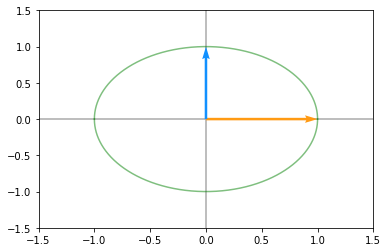

Unit circle transformed by A:


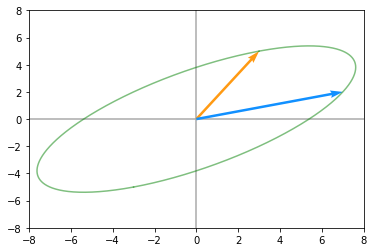

In [7]:
A = np.array([[3, 7], [5, 2]])

print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Unit circle transformed by A:')
matrixToPlot(A)
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

# Dokonujemy rozkładu SVD:

In [8]:
U, D, V = np.linalg.svd(A)
print("U = ", U)
print("D = ", D)
print("V = ", V)

U =  [[-0.85065081 -0.52573111]
 [-0.52573111  0.85065081]]
D =  [8.71337969 3.32821489]
V =  [[-0.59455781 -0.80405286]
 [ 0.80405286 -0.59455781]]


## Pokażemy teraz jak nasz bazowy okrąg zmienia się pod wpływem składowych transformacji

Unit circle:


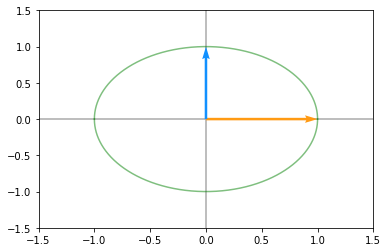

First rotation:


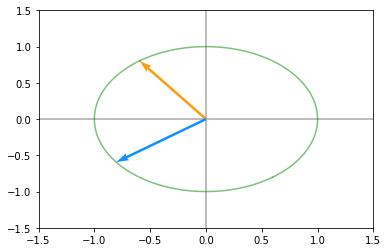

Scaling:


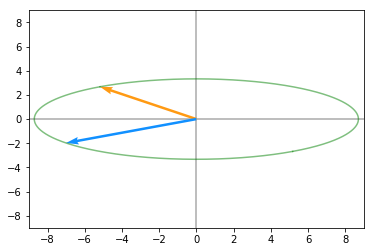

Second rotation:


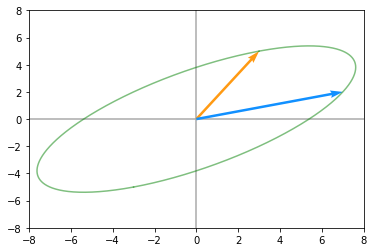

In [9]:
# Unit circle
print('Unit circle:')
matrixToPlot(np.array([[1, 0], [0, 1]]))
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('First rotation:')
matrixToPlot(V)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.show()

print('Scaling:')
matrixToPlot(np.diag(D).dot(V))
plt.xlim(-9, 9)
plt.ylim(-9, 9)
plt.show()

print('Second rotation:')
matrixToPlot(U.dot(np.diag(D)).dot(V))
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.show()

## Transformacja SVD działa na dowolnych (niekwadratowych) macierzach.